# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
df = pd.read_csv('output/merged_billionaires_vFinal.csv')



Basic personal details and demographic identifiers. `rank`, `personName`, `firstName`, `lastName`, `title`, `age`, `gender`, `birthDate`, `birthYear`, `birthMonth`, `birthDay`, `status` 

Financial and occupational information including wealth amount, origin, and inheritance or founder status `finalWorth`, `category`, `source`, `industries`, `organization`, `selfMade`, `wealth.how.category`, `wealth.how.from emerging`, `wealth.how.inherited`, `wealth.how.was founder`, `wealth.how.was political` 

Residence and geographic coordinates: `country`, `countryOfCitizenship`, `city`, `state`, `residenceStateRegion`, `latitude_country`, `longitude_country`

 Country-level economic and social indicators: `cpi_country`, `cpi_change_country`, `gdp_country`, `gross_tertiary_education_enrollment`, `gross_primary_education_enrollment_country`, `life_expectancy_country`, `tax_revenue_country_country`, `total_tax_rate_country`, `population_country` 
 
Education `Education` (`Bachelor`, `Master`, `Doctorate`, `Drop Out`) 

In [3]:
print(df.columns.tolist())


['rank', 'finalWorth', 'category', 'personName', 'age', 'country', 'city', 'source', 'industries', 'countryOfCitizenship', 'organization', 'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country', 'Education', 'Bachelor', 'Master', 'Doctorate', 'Drop Out', 'Marital Status', 'Children', 'wealth.how.category', 'wealth.how.from emerging', 'wealth.how.inherited', 'wealth.how.was founder', 'wealth.how.was political']


In [4]:
# Number of rows
num_rows = df.shape[0]
print("Number of rows:", num_rows)

# Number of features
num_features = df.shape[1]
print("Number of features:", num_features)

# Variable types 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()


print("Numeric:", len(numeric_cols), numeric_cols)
print("Categorical:", len(categorical_cols), categorical_cols)
print("Dates:", len(datetime_cols), datetime_cols)
print(df.dtypes)



Number of rows: 2644
Number of features: 47
Numeric: 21 ['rank', 'finalWorth', 'age', 'birthYear', 'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 'life_expectancy_country', 'tax_revenue_country_country', 'total_tax_rate_country', 'population_country', 'latitude_country', 'longitude_country', 'Bachelor', 'Master', 'Doctorate', 'Drop Out', 'Children']
Categorical: 25 ['category', 'personName', 'country', 'city', 'source', 'industries', 'countryOfCitizenship', 'organization', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion', 'gdp_country', 'Education', 'Marital Status', 'wealth.how.category', 'wealth.how.from emerging', 'wealth.how.inherited', 'wealth.how.was founder', 'wealth.how.was political']
Dates: 0 []
rank                                            int64
finalWorth                                      int64
category          

In [5]:
df.nunique()


rank                                           219
finalWorth                                     219
category                                        18
personName                                    2638
age                                             79
country                                         78
city                                           741
source                                         906
industries                                      18
countryOfCitizenship                            77
organization                                   294
selfMade                                         2
status                                           6
gender                                           2
birthDate                                     2060
lastName                                      1736
firstName                                     1770
title                                           97
date                                             2
state                          

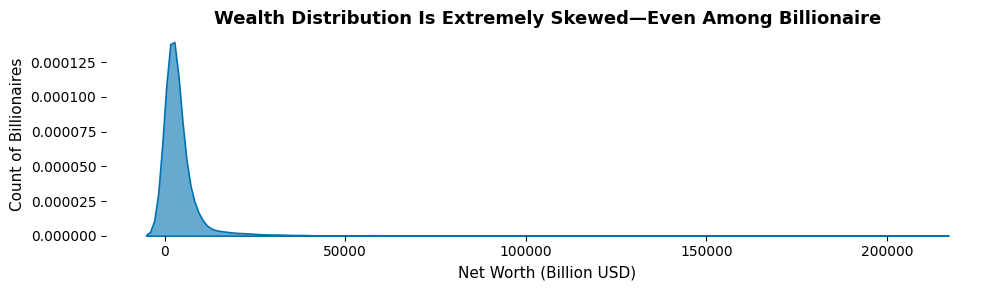

In [6]:
plt.figure(figsize=(10, 3))
sns.kdeplot(
    data=df,
    x="finalWorth",
    fill=True,
    color="#0072B2",
    alpha=0.6,
    linewidth=1.2
)

plt.title("Wealth Distribution Is Extremely Skewed—Even Among Billionaire", fontsize=13, fontweight="bold")
plt.xlabel("Net Worth (Billion USD)", fontsize=11)
plt.ylabel("Count of Billionaires", fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [7]:
# Data Cleaning for the education column
edu_cols = ["Drop Out", "Bachelor", "Master", "Doctorate"]

if all(c in df.columns for c in edu_cols):
    df["education_level"] = (
        0 * df["Drop Out"] +
        1 * df["Bachelor"] +
        2 * df["Master"] +
        3 * df["Doctorate"]
    )


# Interactive Plot

In [8]:
import plotly.express as px
import pandas as pd

from ipywidgets import Dropdown, VBox, Output

FT_BLUE = "#277EBE"
FT_GREY = "#D3D3D3"


# Create dropdown filters

country_dropdown = Dropdown(
    options=["(All Countries)"] + sorted(df["country"].dropna().unique()),
    description="Country:"
)

industry_dropdown = Dropdown(
    options=["(All Industries)"] + sorted(df["industries"].dropna().unique()),
    description="Industry:"
)

education_dropdown = Dropdown(
    options=[
        "(All Education Levels)",
        "Bachelor",
        "Master",
        "Doctorate",
        "Drop Out"
    ],
    description="Education:"
)

selfmade_dropdown = Dropdown(
    options=["(All)", "Self-Made", "Not Self-Made"],
    description="Self-Made:"
)

age_dropdown = Dropdown(
    options=[
        "(All Ages)",
        "Under 40",
        "40–49",
        "50–59",
        "60–69",
        "70–79",
        "80+"
    ],
    description="Age:"
)

out = Output()


# Event handler 

def make_handler(widget):
    def handler(change):
        if change["name"] == "value":
            update_plot()
    return handler

country_dropdown.observe(make_handler(country_dropdown))
industry_dropdown.observe(make_handler(industry_dropdown))
education_dropdown.observe(make_handler(education_dropdown))
selfmade_dropdown.observe(make_handler(selfmade_dropdown))
age_dropdown.observe(make_handler(age_dropdown))



def update_plot():

    out.clear_output()
    c = country_dropdown.value
    ind = industry_dropdown.value
    edu = education_dropdown.value
    sm = selfmade_dropdown.value
    age_sel = age_dropdown.value

    df_filtered = df.copy()

# Multi filter logic
    if c != "(All Countries)":
        df_filtered = df_filtered[df_filtered["country"] == c]

    if ind != "(All Industries)":
        df_filtered = df_filtered[df_filtered["industries"] == ind]

    # Education dummy columns (Drop Out, Bachelor, Master, Doctorate)
    if edu != "(All Education Levels)":
        df_filtered = df_filtered[df_filtered[edu] == 1]

    if sm != "(All)":
        df_filtered = df_filtered[df_filtered["selfMade"] == (sm == "Self-Made")]

    if age_sel != "(All Ages)":
        if age_sel == "Under 40":
            df_filtered = df_filtered[df_filtered["age"] < 40]
        elif age_sel == "40–49":
            df_filtered = df_filtered[(df_filtered["age"] >= 40) & (df_filtered["age"] <= 49)]
        elif age_sel == "50–59":
            df_filtered = df_filtered[(df_filtered["age"] >= 50) & (df_filtered["age"] <= 59)]
        elif age_sel == "60–69":
            df_filtered = df_filtered[(df_filtered["age"] >= 60) & (df_filtered["age"] <= 69)]
        elif age_sel == "70–79":
            df_filtered = df_filtered[(df_filtered["age"] >= 70) & (df_filtered["age"] <= 79)]
        elif age_sel == "80+":
            df_filtered = df_filtered[df_filtered["age"] >= 80]

    if df_filtered.empty:
        with out:
            print("No data available for the selected filter combination.")
        return

# Grouping Logic
    if ind == "(All Industries)":
        group_col = "industries"
    else:
        group_col = "country"

    df_grouped = (
        df_filtered.groupby(group_col)["finalWorth"]
        .sum()
        .reset_index()
        .sort_values("finalWorth", ascending=False)
    )

 # Print top 10 and others
    if len(df_grouped) > 10:
        top10 = df_grouped.head(10)
        others_sum = df_grouped["finalWorth"].iloc[10:].sum()
        others_row = pd.DataFrame({group_col: ["Others"], "finalWorth": [others_sum]})
        df_grouped = pd.concat([top10, others_row], ignore_index=True)

    top_category = df_grouped.iloc[0][group_col]

# Title
    title_parts = []

    if c != "(All Countries)":
        title_parts.append(f"in {c}")
    if edu != "(All Education Levels)":
        title_parts.append(f"with {edu} education")
    if sm != "(All)":
        title_parts.append("self-made" if sm == "Self-Made" else "not self-made")
    if age_sel != "(All Ages)":
        title_parts.append(f"aged {age_sel.lower()}")

    condition_text = ", ".join(title_parts) if title_parts else "globally"

    title = f"{top_category} is the largest contributor<br>{condition_text}"


    max_value = df_grouped["finalWorth"].max()
    df_grouped["color"] = df_grouped["finalWorth"].apply(
        lambda x: FT_BLUE if x == max_value else FT_GREY
    )

# Plot
    fig = px.bar(
        df_grouped,
        x=group_col,
        y="finalWorth",
        text="finalWorth",
        title=title,
        color="color",
        color_discrete_map="identity",
        labels={"finalWorth": "Total Net Worth (USD Millions)"}
    )

    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    fig.update_layout(showlegend=False, title_x=0.5, height=600)

    with out:
        fig.show()



display(VBox([
    country_dropdown,
    industry_dropdown,
    education_dropdown,
    selfmade_dropdown,
    age_dropdown,
    out
]))

update_plot()


In [9]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# ============================================================
# CONFIG
# ============================================================
CSV_PATH = "merged_billionaires_cleaned.csv"
MIN_CAT_FREQ = 10          # min frequency for a category before grouping into 'Other'
MIN_LASSO_FEATURES = 15    # minimum features to keep after LASSO (else skip LASSO)
RIDGE_ALPHAS = np.logspace(-2, 4, 40)


In [10]:
# clean identifiers
identifier_cols = [
    "personName", "firstName", "lastName",
    "birthDate", "birthDay", "birthMonth",
    "organization", "position", "title",
    "source", "companyName", "city", "state", "Education"
]
df = df.drop(columns=[c for c in identifier_cols if c in df.columns], errors="ignore")



# Clean GDP
def clean_gdp_value(x):
    """
    Convert strings like '$530,832,908,738' to float 530832908738.
    Returns NaN for invalid entries.
    """
    try:
        x = str(x)
        x = x.replace("$", "").replace(",", "").strip()
        return float(x)
    except Exception:
        return np.nan

gdp_cols = [c for c in df.columns if "gdp" in c.lower()]
for col in gdp_cols:
    df[col] = df[col].apply(clean_gdp_value)
# Clean Cat
cat_like_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

# Fill NA
for col in cat_like_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].fillna("Unknown")

for col in df.select_dtypes(include=["object", "category"]).columns:
    freqs = df[col].value_counts()
    rare_levels = freqs[freqs < MIN_CAT_FREQ].index
    if len(rare_levels) > 0:
        df[col] = df[col].replace(rare_levels, "Other")



In [13]:
TARGET_COL = "finalWorth"
y = df[TARGET_COL].astype(float).values

numeric_cols = (
    df.select_dtypes(include=[np.number])
      .drop(columns=[TARGET_COL, "rank"], errors="ignore")
      .columns.tolist()
)

categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()


# Preprocessor
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("encoder", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)


X_pre = preprocessor.fit_transform(df)
cat_names = preprocessor.named_transformers_["cat"] \
                        .named_steps["encoder"] \
                        .get_feature_names_out(categorical_cols)

feature_names = np.concatenate([numeric_cols, cat_names])
X_df = pd.DataFrame(X_pre, columns=feature_names)



In [14]:
# Feature selection using Lasso
lasso = LassoCV(cv=5, random_state=42).fit(X_pre, y)
lasso_coefs = lasso.coef_
non_zero_idx = np.where(lasso_coefs != 0)[0]

if len(non_zero_idx) < MIN_LASSO_FEATURES:
    print("LASSO selected too few features; skipping LASSO filtering.")
    X_selected = X_pre
    selected_feature_names = feature_names.tolist()
else:
    X_selected = X_pre[:, non_zero_idx]
    selected_feature_names = feature_names[non_zero_idx].tolist()

print("Features after LASSO:", len(selected_feature_names))



LASSO selected too few features; skipping LASSO filtering.
Features after LASSO: 153


In [15]:
# Fit Ridge
ridge = RidgeCV(alphas=RIDGE_ALPHAS, cv=5).fit(X_selected, y)
y_pred = ridge.predict(X_selected)

print("Best Ridge alpha:", ridge.alpha_)

# Metrics
n = len(y)
p = X_selected.shape[1]

r2 = r2_score(y, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
corr_y_ypred = np.corrcoef(y, y_pred)[0, 1]


print(f"R²:               {r2:.4f}")
print(f"Adjusted R²:      {adj_r2:.4f}")
print(f"RMSE:             {rmse:,.2f}")


Best Ridge alpha: 289.4266124716752
R²:               0.0830
Adjusted R²:      0.0266
RMSE:             9,408.99


In [16]:
# Get coefficient
coef_df = pd.DataFrame({
    "Feature": selected_feature_names,
    "Coefficient": ridge.coef_
})
coef_df["Abs"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("Abs", ascending=False)
coef_df.to_csv("descriptive_ridge_clean.csv", index=False)

print("\nTop 20 absolute coefficients:")
print(coef_df.head(20))


Top 20 absolute coefficients:
                                Feature  Coefficient          Abs
115                            status_E -1229.579338  1229.579338
89          countryOfCitizenship_France   972.658867   972.658867
119                            status_U   964.957453   964.957453
128              Marital Status_Married  -918.228996   918.228996
40                       country_France   839.589987   839.589987
16                             Drop Out   839.511932   839.511932
149         wealth.how.was founder_True   823.045196   823.045196
136     wealth.how.category_New Sectors   745.741948   745.741948
134                  Marital Status_nan  -674.967067   674.967067
135       wealth.how.category_Financial  -598.934461   598.934461
114                       selfMade_True  -539.434843   539.434843
127      Marital Status_In Relationship   512.731574   512.731574
22            category_Fashion & Retail   483.028332   483.028332
70          industries_Fashion & Retail   483

In [17]:
# Baseline cat
baseline_dict = {}

for col in categorical_cols:
    categories = sorted(df[col].unique())
    if len(categories) == 0:
        continue
    baseline_dict[col] = categories[0]


for col, base in baseline_dict.items():
    print(f"{col}: baseline = '{base}'")

category: baseline = 'Automotive'
country: baseline = 'Australia'
industries: baseline = 'Automotive'
countryOfCitizenship: baseline = 'Australia'
selfMade: baseline = 'False'
status: baseline = 'D'
gender: baseline = 'F'
date: baseline = '4/4/2023 5:01'
residenceStateRegion: baseline = 'Midwest'
Marital Status: baseline = 'Divorced'
wealth.how.category: baseline = '0'
wealth.how.from emerging: baseline = 'False'
wealth.how.inherited: baseline = '3rd generation'
wealth.how.was founder: baseline = 'False'
wealth.how.was political: baseline = 'False'


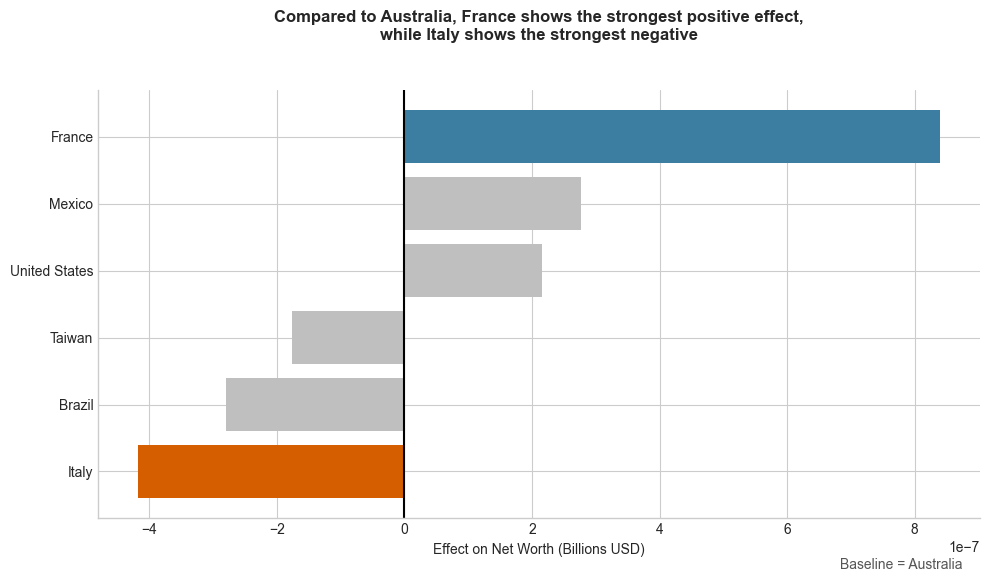

In [18]:
# COUNTRY EFFECTS: top +3 positive and bottom −3 negative
country_coef = coef_df[coef_df["Feature"].str.startswith("country_")].copy()
country_coef["Coefficient_Billions"] = country_coef["Coefficient"] / 1e9

if country_coef.empty:
    print(" No country effects present.")
else:
    sorted_df = country_coef.sort_values("Coefficient_Billions")

    bottom3 = sorted_df.head(3)
    top3 = sorted_df.tail(3)

    plot_df = pd.concat([bottom3, top3])
    plot_df["label"] = plot_df["Feature"].str.replace("country_", "", regex=False)

    max_feat = top3["Feature"].iloc[-1]
    min_feat = bottom3["Feature"].iloc[0]

    def choose_color(row):
        if row["Feature"] == max_feat:
            return "#3B7EA1"
        if row["Feature"] == min_feat:
            return "#D55E00"
        return "#BFBFBF"

    plot_df["color"] = plot_df.apply(choose_color, axis=1)

    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(10,6))

    ax.barh(plot_df["label"], plot_df["Coefficient_Billions"], color=plot_df["color"])
    ax.axvline(0, color="black")
    
    ax.text(
    0.98, -0.12,
    "Baseline = Australia",
    transform=ax.transAxes,
    ha="right",
    fontsize=10,
    color="#555555"
)

    ax.set_title(
        "Compared to Australia, France shows the strongest positive effect,\nwhile Italy shows the strongest negative",
        fontweight="bold",
        y=1.1,
        loc="center"
    )
    ax.set_xlabel("Effect on Net Worth (Billions USD)")
    sns.despine()
    plt.tight_layout()
    plt.show()


In [20]:
# Define feature categories
category_mapping = {
    'Education': ['Drop Out', 'Education', 'degree', 'university'],
    'Geography': ['country', 'countryOfCitizenship', 'city', 'state', 'region', 
                  'latitude', 'longitude', 'continent'],
    'Industry': ['category_', 'industries_'],
    'Wealth Source': ['wealth.how', 'selfMade'],
    'Demographics': ['age', 'gender', 'status_'],
    'Economic Context': ['gdp', 'cpi', 'tax', 'gini', 'corruption', 'ease_doing_business']
}

def assign_category(feature_name):
    """Assign each feature to a category"""
    feature_lower = feature_name.lower()
    
    for category, keywords in category_mapping.items():
        if any(keyword.lower() in feature_lower for keyword in keywords):
            return category
    return 'Other'

# Create analysis dataframe
coef_df['Category'] = coef_df['Feature'].apply(assign_category)

# Calculate category-level metrics
category_analysis = coef_df.groupby('Category').agg({
    'Abs': ['sum', 'mean', 'count'],
    'Coefficient': lambda x: (x**2).sum()  # Sum of squared coefficients
}).round(2)

category_analysis.columns = ['Total_Abs_Coef', 'Mean_Abs_Coef', 'Feature_Count', 'Sum_Squared_Coef']

# Calculate percentage contribution based on absolute coefficients
total_abs = category_analysis['Total_Abs_Coef'].sum()
category_analysis['Pct_Contribution'] = (category_analysis['Total_Abs_Coef'] / total_abs * 100).round(2)

# Sort by contribution
category_analysis = category_analysis.sort_values('Pct_Contribution', ascending=False)

print("\n" + "="*80)
print("CATEGORY-LEVEL CONTRIBUTION TO WEALTH PREDICTION")
print("="*80)
print(category_analysis)

# Visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
axes[0].pie(category_analysis['Pct_Contribution'], 
            labels=category_analysis.index,
            autopct='%1.1f%%',
            startangle=90)
axes[0].set_title('Category Contribution to Wealth Prediction\n(Based on Absolute Coefficients)')

# Bar chart
axes[1].barh(category_analysis.index, category_analysis['Pct_Contribution'])
axes[1].set_xlabel('Percentage Contribution (%)')
axes[1].set_title('Category Importance')
axes[1].invert_yaxis()

plt.tight_layout()
plt.close()

# Detailed breakdown by category
print("\n" + "="*80)
print("TOP FEATURES BY CATEGORY")
print("="*80)
for category in category_analysis.index:
    print(f"\n{category}:")
    category_features = coef_df[coef_df['Category'] == category].nlargest(5, 'Abs')
    for _, row in category_features.iterrows():
        print(f"  {row['Feature']:40s} {row['Coefficient']:>12.2f} (|{row['Abs']:.2f}|)")


CATEGORY-LEVEL CONTRIBUTION TO WEALTH PREDICTION
               Total_Abs_Coef  Mean_Abs_Coef  Feature_Count  Sum_Squared_Coef  \
Category                                                                        
Geography            11632.69         151.07             77        3854027.16   
Industry              9286.66         244.39             38        3177261.91   
Demographics          6487.66         432.51             15        4662988.53   
Wealth Source         3892.19         299.40             13        1769249.21   
Education             1195.88         298.97              4         754766.64   
Other                  916.21         152.70              6         258831.30   

               Pct_Contribution  
Category                         
Geography                 34.82  
Industry                  27.79  
Demographics              19.42  
Wealth Source             11.65  
Education                  3.58  
Other                      2.74  

TOP FEATURES BY CATEGORY

Ge

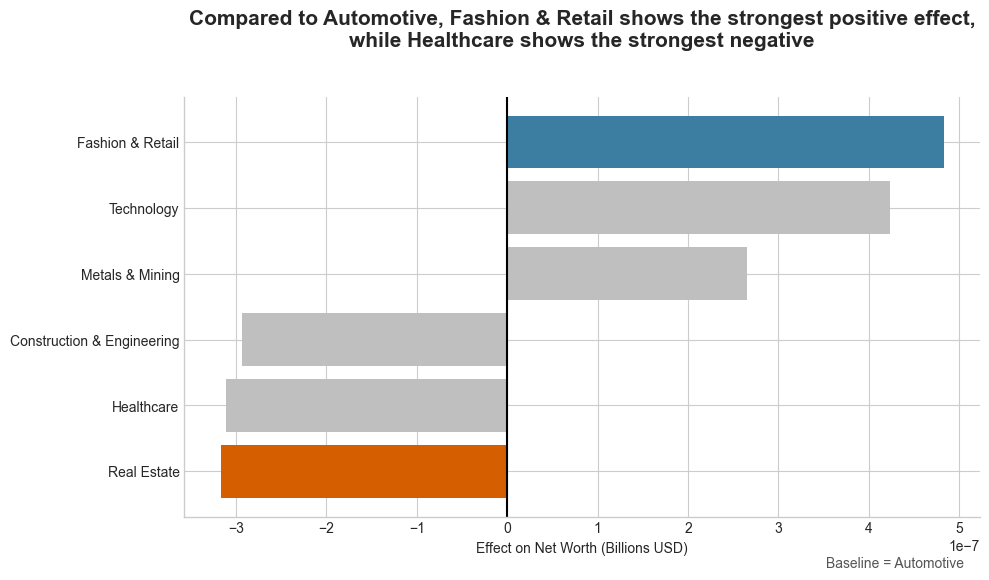

In [21]:
# INDUSTRY EFFECTS: top +3 positive and bottom −3 negative

ind_df = coef_df[coef_df["Feature"].str.startswith("industries_")].copy()
ind_df["Coefficient_Billions"] = ind_df["Coefficient"] / 1e9

sorted_df = ind_df.sort_values("Coefficient_Billions")

bottom3 = sorted_df.head(3)
top3 = sorted_df.tail(3)

plot_df = pd.concat([bottom3, top3])
plot_df["label"] = plot_df["Feature"].str.replace("industries_", "", regex=False)

max_feat = top3["Feature"].iloc[-1]
min_feat = bottom3["Feature"].iloc[0]

def choose_color(row):
    if row["Feature"] == max_feat:
        return "#3B7EA1"
    if row["Feature"] == min_feat:
        return "#D55E00"
    return "#BFBFBF"

plot_df["color"] = plot_df.apply(choose_color, axis=1)

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(plot_df["label"], plot_df["Coefficient_Billions"], color=plot_df["color"])
ax.axvline(0, color="black")

ax.set_title(
    "Compared to Automotive, Fashion & Retail shows the strongest positive effect,\nwhile Healthcare shows the strongest negative",
    fontsize=15,
    fontweight="bold",
    y=1.1,
    loc="center"
)
ax.text(
    0.98, -0.12,
    "Baseline = Automotive",
    transform=ax.transAxes,
    ha="right",
    fontsize=10,
    color="#555555"
)
ax.set_xlabel("Effect on Net Worth (Billions USD)")
sns.despine()
plt.tight_layout()
plt.show()
